In [1]:
import os
import torch
import numpy as np
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as T
import torch.nn.functional as F

from ig_pkg.datasets import get_datasets

from ig_pkg.models.generator import get_model
from ig_pkg.models.classifier import get_classifier
from ig_pkg.models.pretrained_models import get_pretrained_model

from ig_pkg.inputattribs.ig import make_interpolation, ig
from ig_pkg.inputattribs.baseline_generator import get_baseline_generator

from ig_pkg.misc import process_heatmap, normalize_tensor, convert_to_img, convert_mask_img, label_to_class, tran, na_imshow

import time
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from ig_pkg.loss.focal_loss import FocalLoss
from ig_pkg.loss.metrics import ArcMarginProduct, AddMarginProduct

import torchvision.models as models
from torch.autograd import Variable


IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))

device = 'cuda:2'

load attribution, interpolation

In [2]:
import torch 
from ebm_pkg.models import get_model
import numpy as np 
import matplotlib.pyplot as plt 

MNIST_MEAN = [0.1307]
MNIST_STD  = [0.3081] 

root = '/data8/donghun/'
valid_dataset = torchvision.datasets.MNIST(root = root,
                            train=True,
                            # download=True,
                            transform=T.Compose([T.ToTensor(), T.Normalize(mean = MNIST_MEAN, std = MNIST_STD)]),
)

path = f"/home/dhlee/code/paper_code_exercise/prev___ebm_classification/results/train/mnist/baseline/seed_0"

configs = {
    "cnn" : (10, 'relu' , 256, None), 
    # "resnet18" : (flags.num_classes, 'relu', flags.cnn_dim, flags.avg_pool_size)
}
out_features, activation, cnn_dim, last_avg_kernel_size = configs['cnn']
model = get_model('cnn', 
                in_channels=1,
                out_features=out_features,
                activation=activation,
                cnn_dim=cnn_dim,
                dropout_p = 0.5,
                last_avg_kernel_size=last_avg_kernel_size)
model.load_state_dict(torch.load(f"{path}/model_best.pt", map_location='cpu'))
classifier = model.eval().to(device)


cnn


In [102]:
def make_key(keys, method, ratio):
    ans = []
    for i in keys:
        if method in i:
            if ratio in i:
                ans.append(i)
    return ans

pred_key = make_key(avg.keys(), 'pred', '0.2')
# pred_key
                

['pred_0_0.2',
 'pred_10_0.2',
 'pred_11_0.2',
 'pred_12_0.2',
 'pred_13_0.2',
 'pred_14_0.2',
 'pred_15_0.2',
 'pred_16_0.2',
 'pred_17_0.2',
 'pred_18_0.2',
 'pred_19_0.2',
 'pred_1_0.2',
 'pred_20_0.2',
 'pred_21_0.2',
 'pred_22_0.2',
 'pred_23_0.2',
 'pred_24_0.2',
 'pred_2_0.2',
 'pred_3_0.2',
 'pred_4_0.2',
 'pred_5_0.2',
 'pred_6_0.2',
 'pred_7_0.2',
 'pred_8_0.2',
 'pred_9_0.2',
 'pred_zero_0.2']

Show metric

In [20]:
import json

with open("/home/dhlee/code/ig_inversion/results/mnist/evaluation_average_cifar10.json", "r") as st_json:
    avg = json.load(st_json)

with open("/home/dhlee/code/ig_inversion/results/mnist/evaluation_samples_cifar10.json", "r") as all_json:
    all = json.load(all_json)


['morf_0_0.2', 'morf_10_0.2', 'morf_11_0.2', 'morf_12_0.2', 'morf_13_0.2', 'morf_14_0.2', 'morf_15_0.2', 'morf_16_0.2', 'morf_17_0.2', 'morf_18_0.2', 'morf_19_0.2', 'morf_1_0.2', 'morf_20_0.2', 'morf_21_0.2', 'morf_22_0.2', 'morf_23_0.2', 'morf_24_0.2', 'morf_2_0.2', 'morf_3_0.2', 'morf_4_0.2', 'morf_5_0.2', 'morf_6_0.2', 'morf_7_0.2', 'morf_8_0.2', 'morf_9_0.2', 'morf_zero_0.2']
[0.35541666666666666, 0.33131666666666665, 0.32321666666666665, 0.29925, 0.29765, 0.32331666666666664, 0.3297833333333333, 0.3322833333333333, 0.31, 0.31705, 0.3399, 0.33998333333333336, 0.34005, 0.3379333333333333, 0.32785, 0.32385, 0.35925, 0.32915, 0.33921666666666667, 0.3421166666666667, 0.3521166666666667, 0.3265, 0.3081833333333333, 0.3133666666666667, 0.3236833333333333, 0.3020833333333333]


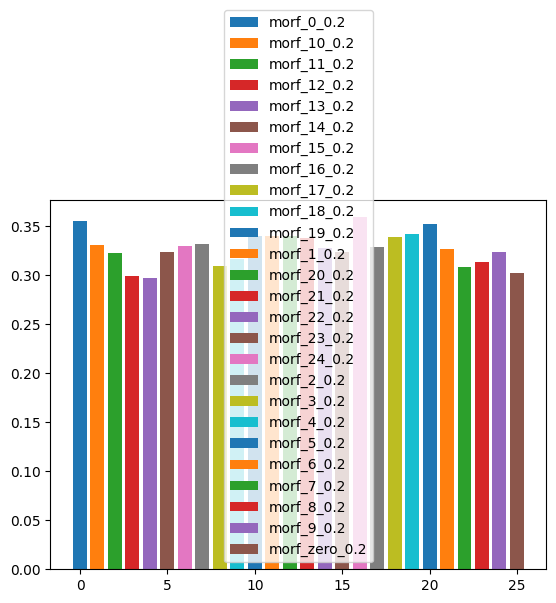

In [59]:
method = "morf"
ratio = "0.2"

check_key = []
for i in list(avg.keys()):
    if ratio in i:
        if method in i:
            # print(i)
            check_key.append(i)

print(check_key)

result = []
for i in check_key:
    result.append(avg[f'{i}'])

print(result)
                
for i in range(len(check_key)):
    plt.bar(i, result[i], label = f'{check_key[i]}')
    plt.legend(loc = 8)
    # plt.bar(check_key, result)




In [103]:
sort_key = [
 'aopc_0_0.2',
 'aopc_1_0.2',
 'aopc_2_0.2',
 'aopc_3_0.2',
 'aopc_4_0.2',
 'aopc_5_0.2',
 'aopc_6_0.2',
 'aopc_7_0.2',
 'aopc_8_0.2',
 'aopc_9_0.2', 
 'aopc_10_0.2',
 'aopc_11_0.2',
 'aopc_12_0.2',
 'aopc_13_0.2',
 'aopc_14_0.2',
 'aopc_15_0.2',
 'aopc_16_0.2',
 'aopc_17_0.2',
 'aopc_18_0.2',
 'aopc_19_0.2',
 'aopc_20_0.2',
 'aopc_21_0.2',
 'aopc_22_0.2',
 'aopc_23_0.2',
 'aopc_24_0.2',
]
# sort_key
sort_morf = [
 'morf_0_0.2',
 'morf_1_0.2',
 'morf_2_0.2',
 'morf_3_0.2',
 'morf_4_0.2',
 'morf_5_0.2',
 'morf_6_0.2',
 'morf_7_0.2',
 'morf_8_0.2',
 'morf_9_0.2', 
 'morf_10_0.2',
 'morf_11_0.2',
 'morf_12_0.2',
 'morf_13_0.2',
 'morf_14_0.2',
 'morf_15_0.2',
 'morf_16_0.2',
 'morf_17_0.2',
 'morf_18_0.2',
 'morf_19_0.2',
 'morf_20_0.2',
 'morf_21_0.2',
 'morf_22_0.2',
 'morf_23_0.2',
 'morf_24_0.2',
]

sort_pred = [
 'pred_0_0.2',
 'pred_1_0.2',
 'pred_2_0.2',
 'pred_3_0.2',
 'pred_4_0.2',
 'pred_5_0.2',
 'pred_6_0.2',
 'pred_7_0.2',
 'pred_8_0.2',
 'pred_9_0.2', 
 'pred_10_0.2',
 'pred_11_0.2',
 'pred_12_0.2',
 'pred_13_0.2',
 'pred_14_0.2',
 'pred_15_0.2',
 'pred_16_0.2',
 'pred_17_0.2',
 'pred_18_0.2',
 'pred_19_0.2',
 'pred_20_0.2',
 'pred_21_0.2',
 'pred_22_0.2',
 'pred_23_0.2',
 'pred_24_0.2',
]

In [55]:
# res_aopc = []
# for i in sort_key:
#     res_aopc.append(avg[f'{i}'])
    
# arr_aopc = np.array(res_aopc)
# arr_aopc = arr_aopc.reshape((5, 5))
# arr_aopc


res_morf = []
for i in sort_morf:
    res_morf.append(avg[f'{i}'])
    
arr_morf = np.array(res_morf)
arr_morf = arr_morf.reshape((5, 5))
# arr_aopc


In [56]:
arr_morf

array([[0.35541667, 0.33998333, 0.32915   , 0.33921667, 0.34211667],
       [0.35211667, 0.3265    , 0.30818333, 0.31336667, 0.32368333],
       [0.33131667, 0.32321667, 0.29925   , 0.29765   , 0.32331667],
       [0.32978333, 0.33228333, 0.31      , 0.31705   , 0.3399    ],
       [0.34005   , 0.33793333, 0.32785   , 0.32385   , 0.35925   ]])

Text(0.5, 1.0, 'morf, zero-0.302')

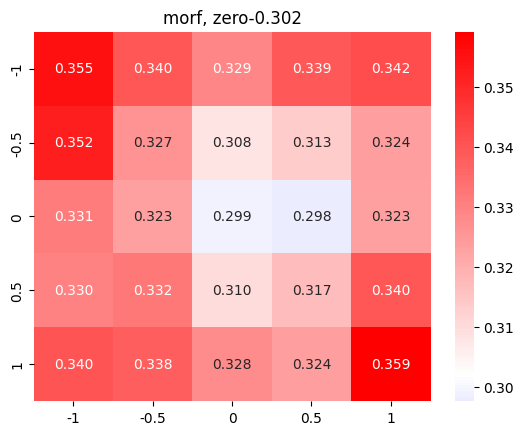

In [61]:
import seaborn as sns

# sns.heatmap(arr_aopc, cmap='plasma')
# sns.heatmap(arr_aopc, cmap='bwr', center=0.68, annot=True, fmt='0.3f', cbar=True,  xticklabels=axis, yticklabels=axis, )
# plt.title('aopc, zero-0.687')

sns.heatmap(arr_morf, cmap='bwr', center=0.302, annot=True, fmt='0.3f', cbar=True,  xticklabels=axis, yticklabels=axis, )
plt.title('morf, zero-0.302')

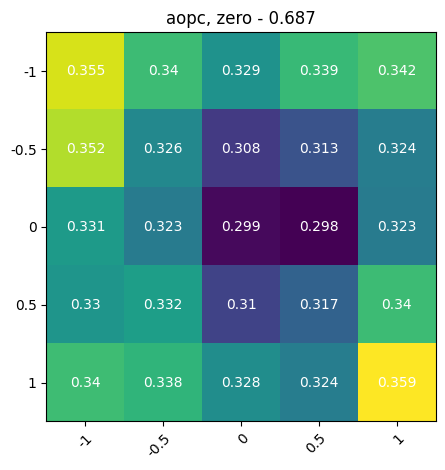

In [62]:
# my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))

fig, ax = plt.subplots()
im = ax.imshow(arr_morf)

axis = [-1, -0.5, 0, 0.5, 1]

# We want to show all ticks...
ax.set_xticks(np.arange(len(axis)))
ax.set_yticks(np.arange(len(axis)))
# ... and label them with the respective list entries
ax.set_xticklabels(axis)
ax.set_yticklabels(axis)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(axis)):
    for j in range(len(axis)):
        text = ax.text(j, i, round(arr_morf[i, j], 3),
                       ha="center", va="center", color="w")

ax.set_title("aopc, zero - 0.687")
fig.tight_layout()
plt.show()

class specific score (aopc, morf)

In [68]:
all.keys()

dict_keys(['aopc_0_0.01', 'aopc_0_0.1', 'aopc_0_0.2', 'aopc_10_0.01', 'aopc_10_0.1', 'aopc_10_0.2', 'aopc_11_0.01', 'aopc_11_0.1', 'aopc_11_0.2', 'aopc_12_0.01', 'aopc_12_0.1', 'aopc_12_0.2', 'aopc_13_0.01', 'aopc_13_0.1', 'aopc_13_0.2', 'aopc_14_0.01', 'aopc_14_0.1', 'aopc_14_0.2', 'aopc_15_0.01', 'aopc_15_0.1', 'aopc_15_0.2', 'aopc_16_0.01', 'aopc_16_0.1', 'aopc_16_0.2', 'aopc_17_0.01', 'aopc_17_0.1', 'aopc_17_0.2', 'aopc_18_0.01', 'aopc_18_0.1', 'aopc_18_0.2', 'aopc_19_0.01', 'aopc_19_0.1', 'aopc_19_0.2', 'aopc_1_0.01', 'aopc_1_0.1', 'aopc_1_0.2', 'aopc_20_0.01', 'aopc_20_0.1', 'aopc_20_0.2', 'aopc_21_0.01', 'aopc_21_0.1', 'aopc_21_0.2', 'aopc_22_0.01', 'aopc_22_0.1', 'aopc_22_0.2', 'aopc_23_0.01', 'aopc_23_0.1', 'aopc_23_0.2', 'aopc_24_0.01', 'aopc_24_0.1', 'aopc_24_0.2', 'aopc_2_0.01', 'aopc_2_0.1', 'aopc_2_0.2', 'aopc_3_0.01', 'aopc_3_0.1', 'aopc_3_0.2', 'aopc_4_0.01', 'aopc_4_0.1', 'aopc_4_0.2', 'aopc_5_0.01', 'aopc_5_0.1', 'aopc_5_0.2', 'aopc_6_0.01', 'aopc_6_0.1', 'aopc_6_0.2'

In [78]:
# init
# score_aopc = {}
# for i in range(10):
#     j = str(i)
#     score_aopc[j] = 0
# score_aopc

# 
# for i in range(10):
#     temp = index[f'{i}']
#     temp_aopc  = []
#     for j in sort_key:
#         temp_method = all[j]
#         temp_aopc.append(temp_method[temp])
#         break
#     # score_aopc['']
#     break
# temp_aopc

class_aopc = {}
class_mean_aopc = {}
for i in sort_key:
    temp_method = np.array(all[i])
    temp_dict = {}
    mean_dict = {}
    for j in range(10):
        temp_idx = index[f'{j}']
        temp = temp_method[temp_idx]
        
        
        mean_dict[f'{j}']=np.mean(temp)
        temp_dict[f'{j}']=temp
        
    class_mean_aopc[i] = mean_dict
    class_aopc[i] = temp_dict


class_morf = {}
class_mean_morf = {}
for i in sort_morf:
    temp_method = np.array(all[i])
    temp_dict = {}
    mean_dict = {}
    for j in range(10):
        temp_idx = index[f'{j}']
        temp = temp_method[temp_idx]
        
        
        mean_dict[f'{j}']=np.mean(temp)
        temp_dict[f'{j}']=temp
        
    class_mean_morf[i] = mean_dict
    class_morf[i] = temp_dict
    
    #     # print(len(temp_idx))
    #     # print(len(temp))
    #     break
    # # print(temp_method)
    # break

In [96]:
class_aopc_inv = {}
class_mean_aopc_inv = {}
for i in range(10):
    temp_idx = index[f'{i}']
    
    temp_dict = {}
    mean_dict = {}
    for j in sort_key:
        temp_method = np.array(all[j])
        temp = temp_method[temp_idx]        
        
        mean_dict[f'{j}']=np.mean(temp)
        temp_dict[f'{j}']=temp
        
    class_mean_aopc_inv[i] = mean_dict
    class_aopc_inv[i] = temp_dict

class_morf_inv = {}
class_mean_morf_inv = {}
for i in range(10):
    temp_idx = index[f'{i}']
    
    temp_dict = {}
    mean_dict = {}
    for j in sort_morf:
        temp_method = np.array(all[j])
        temp = temp_method[temp_idx]        
        
        mean_dict[f'{j}']=np.mean(temp)
        temp_dict[f'{j}']=temp
        
    class_mean_morf_inv[i] = mean_dict
    class_morf_inv[i] = temp_dict

In [105]:

# class_mean_aopc_inv
for i in range(10):
    plt.figure()
    res_morf = []
    # temp = class_aopc_inv[f'{i}']
    temp = class_mean_morf_inv[i]
    for j in sort_morf:
        res_morf.append(temp[f'{j}'])
        
    arr_morf = np.array(res_morf)
    arr_morf = arr_morf.reshape((5, 5))
    
    # ax = next(axes_flat)
    # axes_flat[i] = sns.heatmap(arr_morf, cmap='bwr', annot=True, fmt='0.3f', cbar=True,  xticklabels=axis, yticklabels=axis, )
    sns.heatmap(arr_morf, cmap='bwr', annot=True, fmt='0.3f', cbar=True,  xticklabels=axis, yticklabels=axis, )
    plt.title(f'morf - {i}')
    # ax.show()
# plt.show()


In [120]:
axis_num = np.arange(10)
for i in sort_pred:
    plt.figure(figsize=(15,15))
    ans = np.zeros((10, 10))
    pr = all[i]
    for j in range(10):
        idx = index[f'{j}']
        for k in idx:
            col = pr[k]
            ans[j][col] += 1
    # print(pr)
    sns.heatmap(ans, cmap='plasma', annot=True, cbar=True, xticklabels=axis_num, yticklabels=axis_num,)
    plt.ylabel('True')
    plt.xlabel('predicted')
    plt.title(f'{i} - remove 20%')
    # plt.savefig(f'/home/dhlee/code/ig_inversion/figure/mnist/{i}.png')
    # break
        

In [25]:
wrong = []
for i in check_key:
    temp = all[i]
    
    idx = []
    for j in range(len(temp)):
        if temp[j]: pass
        else: idx.append(j)
    wrong.append(idx)

In [30]:
score = {}
for i in range(10):
    j = str(i)
    score[j] = 0
score

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0}

In [35]:
import copy

all_score = []

for i in range(len(wrong)):
    one_score = copy.deepcopy(score)
    wr = wrong[i]
    
    for j in range(len(wr)):
        idx = wr[j]
        lab = valid_dataset[idx][1]
        
        one_score[f'{lab}'] = one_score[f'{lab}'] + 1
    all_score.append(one_score)
    
    # break
        

In [36]:
for i in range(len(all_score)):
    print(check_key[i])
    print(all_score[i])
# one_score
# score

morf_expected_0.2
{'0': 428, '1': 584, '2': 566, '3': 655, '4': 465, '5': 916, '6': 73, '7': 703, '8': 556, '9': 419}
morf_image_fgsm_0.2
{'0': 641, '1': 722, '2': 587, '3': 642, '4': 580, '5': 906, '6': 63, '7': 824, '8': 654, '9': 622}
morf_image_gradient_ascent_0.2
{'0': 531, '1': 532, '2': 548, '3': 578, '4': 512, '5': 938, '6': 58, '7': 774, '8': 543, '9': 534}
morf_image_gradient_descent_0.2
{'0': 527, '1': 690, '2': 572, '3': 635, '4': 550, '5': 931, '6': 68, '7': 764, '8': 587, '9': 476}
morf_image_pgd_0.2
{'0': 327, '1': 540, '2': 596, '3': 650, '4': 468, '5': 901, '6': 107, '7': 709, '8': 532, '9': 400}
morf_image_simple_fgsm_0.2
{'0': 500, '1': 671, '2': 613, '3': 615, '4': 563, '5': 885, '6': 70, '7': 760, '8': 606, '9': 510}
morf_image_simple_gradient_ascent_0.2
{'0': 24, '1': 418, '2': 455, '3': 588, '4': 698, '5': 626, '6': 699, '7': 649, '8': 389, '9': 368}
morf_image_simple_gradient_descent_0.2
{'0': 24, '1': 418, '2': 455, '3': 588, '4': 698, '5': 626, '6': 699, '7': 

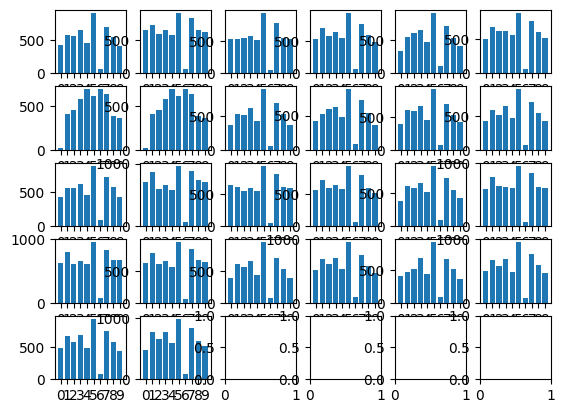

In [59]:
fig, axes = plt.subplots(5, 6)
axes_flat = axes.flat 
# my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))
for i in range(len(check_key)):
    ax = next(axes_flat)
    # ax.imshow(convert_to_img(x))

    # plt.plot(one_score)
    # print(i)
    ax.bar(*zip(*sorted(all_score[i].items())))
    # print(all_score[i])


In [85]:
print(check_key[6])
print(check_key[7])

morf_image_simple_gradient_ascent_0.2
morf_image_simple_gradient_descent_0.2


In [86]:
for i in range(20):
    lab = valid_dataset[i][1]
    if lab == 0:
        print(i)

3
10


In [87]:
convert_to_img(valid_dataset[3][0]).shape

(32, 32, 3)

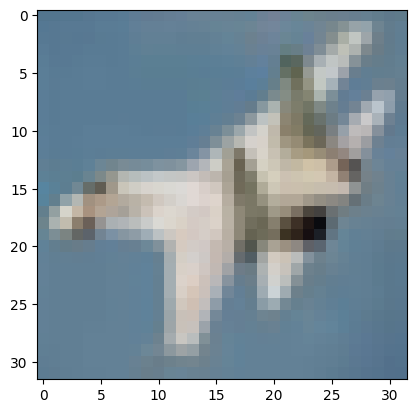

In [89]:
from ig_pkg.misc import convert_to_img
plt.imshow(convert_to_img(valid_dataset[10][0]))

indexing

In [5]:
index = {}
for i in range(10):
    j = str(i)
    index[j] = []
index

{'0': [],
 '1': [],
 '2': [],
 '3': [],
 '4': [],
 '5': [],
 '6': [],
 '7': [],
 '8': [],
 '9': []}

In [6]:
for i in range(len(valid_dataset)):
    lab = valid_dataset[i][1]
    # print(lab)
    # print(index[f'{lab}'])
    temp = index[f'{lab}']
    temp.append(i)
    index[f'{lab}'] = temp

In [11]:
le = 0
for i in range(10):
    t = str(i)
    le += len(index[t])
    print(len(index[t]))
le

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


60000

In [12]:
with open(os.path.join('/home/dhlee/code/ig_inversion/results/mnist', f"class_index_mnist.json"), 'w') as f:
    json.dump(index, f, indent=2, sort_keys=True)            

In [92]:
di = {}
for i in range(len(check_key)):
    di[f'{check_key[i]}'] = all_score[i]
di

{'morf_expected_0.2': {'0': 428,
  '1': 584,
  '2': 566,
  '3': 655,
  '4': 465,
  '5': 916,
  '6': 73,
  '7': 703,
  '8': 556,
  '9': 419},
 'morf_image_fgsm_0.2': {'0': 641,
  '1': 722,
  '2': 587,
  '3': 642,
  '4': 580,
  '5': 906,
  '6': 63,
  '7': 824,
  '8': 654,
  '9': 622},
 'morf_image_gradient_ascent_0.2': {'0': 531,
  '1': 532,
  '2': 548,
  '3': 578,
  '4': 512,
  '5': 938,
  '6': 58,
  '7': 774,
  '8': 543,
  '9': 534},
 'morf_image_gradient_descent_0.2': {'0': 527,
  '1': 690,
  '2': 572,
  '3': 635,
  '4': 550,
  '5': 931,
  '6': 68,
  '7': 764,
  '8': 587,
  '9': 476},
 'morf_image_pgd_0.2': {'0': 327,
  '1': 540,
  '2': 596,
  '3': 650,
  '4': 468,
  '5': 901,
  '6': 107,
  '7': 709,
  '8': 532,
  '9': 400},
 'morf_image_simple_fgsm_0.2': {'0': 500,
  '1': 671,
  '2': 613,
  '3': 615,
  '4': 563,
  '5': 885,
  '6': 70,
  '7': 760,
  '8': 606,
  '9': 510},
 'morf_image_simple_gradient_ascent_0.2': {'0': 24,
  '1': 418,
  '2': 455,
  '3': 588,
  '4': 698,
  '5': 626,
  

In [94]:
with open(os.path.join('/home/dhlee/code/ig_inversion/results/json', f"morf_class_score_cifar10.json"), 'w') as f:
    json.dump(di, f, indent=2, sort_keys=True)            

In [ ]:
index = {}
for i in range(10):
    j = str(i)
    index[j] = []
index

{'0': [],
 '1': [],
 '2': [],
 '3': [],
 '4': [],
 '5': [],
 '6': [],
 '7': [],
 '8': [],
 '9': []}

In [ ]:
index = {}
for i in range(10):
    j = str(i)
    index[j] = []
index

{'0': [],
 '1': [],
 '2': [],
 '3': [],
 '4': [],
 '5': [],
 '6': [],
 '7': [],
 '8': [],
 '9': []}

show interpolation

etc

In [ ]:
pr = 'aopc_image_gradient_0.01'
re = "".join(reversed(pr))
print(pr.find('_'))
print(re.find('_'))
print(len(pr)- re.find('_'))
print(pr[4], pr[20 - 1])
print(pr[4+1:20-1])

In [49]:
from tqdm import tqdm
device='cuda:5'
# classifier = torch.load('/data8/donghun/cifar10/results/densenet/script_model.pt', map_location='cpu').eval().to(device)
# classifier = mo.eval().to(device)
classifier = model.eval().to(device)
valid_dataloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=False, num_workers=2)

sc = 0
for i, j in enumerate(tqdm(valid_dataloader)):
    input, labe = j
    labe = labe.to(device)
    input = input.to(device)
    hat = torch.argmax(classifier(input), dim=-1)
    # print(hat)
    
    c = (hat==labe).sum().item()
    # print(c)
    sc += c
    # break
    

100%|██████████| 3750/3750 [00:10<00:00, 351.27it/s]
